## In this notebook we will 
* import our saved NLCD data into a numpy array
* create a custom colormap to match the NLCD legend
* plot the image using our colormap

### Step 1: Import all the libraries we need for this script.

In [18]:
import rasterio as rs
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

### Step 2: Use the rasterio library to open and show the tif file.

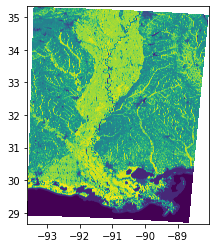

<AxesSubplot:>

In [19]:
path = 'C:/Users/brand/Documents/data/NLCD_LowerMSAlluvialValley/reprojected/';
filename = 'NLCD_2019_Land_Cover_LowerMSAlluvialValley_reprojected.tif';
file = path + filename

img = rs.open(file)
show(img)

### Step 3: Read the tif file into a numpy array.

It is useful to know how many bands are in the tif file. We can see that with:

In [20]:
print(img.indexes)     # prints (1,)

(1,)


The NLCD data has just one band. We can read the data in that band with the read() method.

In [21]:
band = 1    
data = img.read(band)

### Step 4: Get lat and lon from img bounding box.

We can see the bounding box with:

In [22]:
bbox = img.bounds   # bounding box
print(bbox)

BoundingBox(left=-93.621602768, bottom=28.660521567, right=-88.048426279, top=35.328081216)


We need to save these bounds to use in the <code>extent</code> argument of <code>imshow</code>

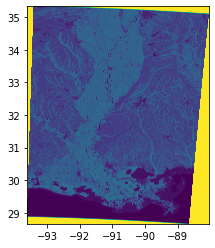

In [23]:
lon1 = bbox.left
lon2 = bbox.right
lat1 = bbox.bottom
lat2 = bbox.top

plt.imshow(data,extent=[lon1,lon2,lat1,lat2])

It's good to know the image still looks right, but this uses a default colormap. We want to set our colormap to look like the NLCD legend shown here.

<img src="NLCD_Land_Cover_Legend.PNG" width="340" height="400" align="left"/>

### Step 5: Define land cover types, numerical categories, and colormap from the NLCD legend.

In [24]:
# All land cover types in the NLCD dataset
AllLandCoverTypes = ["Ocean","Open Water","Perennial Ice/Snow","Developed, Open Space",
                 "Developed, Low Intensity","Developed, Medium Intensity",
                 "Developed, High Intensity","Barren Land (Rock/Sand/Clay)",
                 "Deciduous Forest","Evergreen Forest","Mixed Forest",
                 "Dwarf Scrub (AK only)","Shrub/Scrub","Grasslands/Herbaceous",
                 "Sedge/Herbaceous (AK only)","Lichens (AK only)","Moss (AK only)",
                 "Pasture/Hay","Cultivated Crops","Woody Wetlands",
                 "Emergent Herbaceous Wetlands","NA"]
             
# All numerical categories from the NLCD legend            
AllCats = [0,11,12,21,22,23,24,31,41,42,43,51,52,71,72,73,74,81,82,90,95,255]

# Colors from the NLCD legend
# I have added a color to the beginning and end of the array to account for the 'NA' and '0' data
nlcd_rgb = np.array([ [25,25,25], [61,97,150], [209,221,249], [221,201,201], [216,147,130],
                      [237,0,0], [170,0,0], [178,173,163], [104,170,99],
                      [28,99,48], [181,201,142], [176,151,61], [204,186,124],
                      [226,226,193], [209,209,130], [153,194,70], [130,186,158],
                      [219,216,61], [170,112,40], [186,216,234], [112,163,186], [255,255,255] ])

# Scale rgb colors from 0 to 1
nlcd_rgb = nlcd_rgb/255

# Get numerical categories present in our data
cats_in_data = np.unique(data)
print(cats_in_data)

[  0  11  21  22  23  24  31  41  42  43  52  71  81  82  90  95 255]


We can see that our dataset does not include the land cover categories of 12, 51, 72, 73, or 74. Next, we need to get the indices of the categories that are included in our data to modify the colormap and land cover labels.

In [25]:
# Get the indices of the NLCD categories that are present in our data.
idx = []
for i in range(len(AllCats)):
    if AllCats[i] in cats_in_data:
        idx.append(i)

# Get the land cover types present in our data. For this example, our data 
# should include all categories except 12, 51, 72, 73, and 74.
lct = [AllLandCoverTypes[i] for i in idx]

# Get the colormap colors for the land cover types present in our data.
rgb = nlcd_rgb[idx,:]

# insert a column of ones into index 3 of the rgb array for the alpha values
rgb = np.insert(rgb, 3, np.ones(len(rgb)), axis=1)

We can use the matplotlib.colors.ListedColormap method to generate a custom colormap from our list of colors.

In [26]:
rgb_cmap = ListedColormap(rgb)

In order to map the categories from our dataset to the correct colors in our colormap, we need to change our data to go from [0 ... 16], instead of [0 11 ... 95 255]. This will allow for a 1-to-1 mapping from our data to our colormap.

In [27]:
# change dataset to go from 0 to 16 so it will scale correctly with our colormap
data2 = data

for idx, cat in enumerate(cats_in_data):    
    data2[data2==cat] = idx

### Step 5: Plot the map.

Finally, let's plot our map and set up the legend to display the list of land cover types in our data.

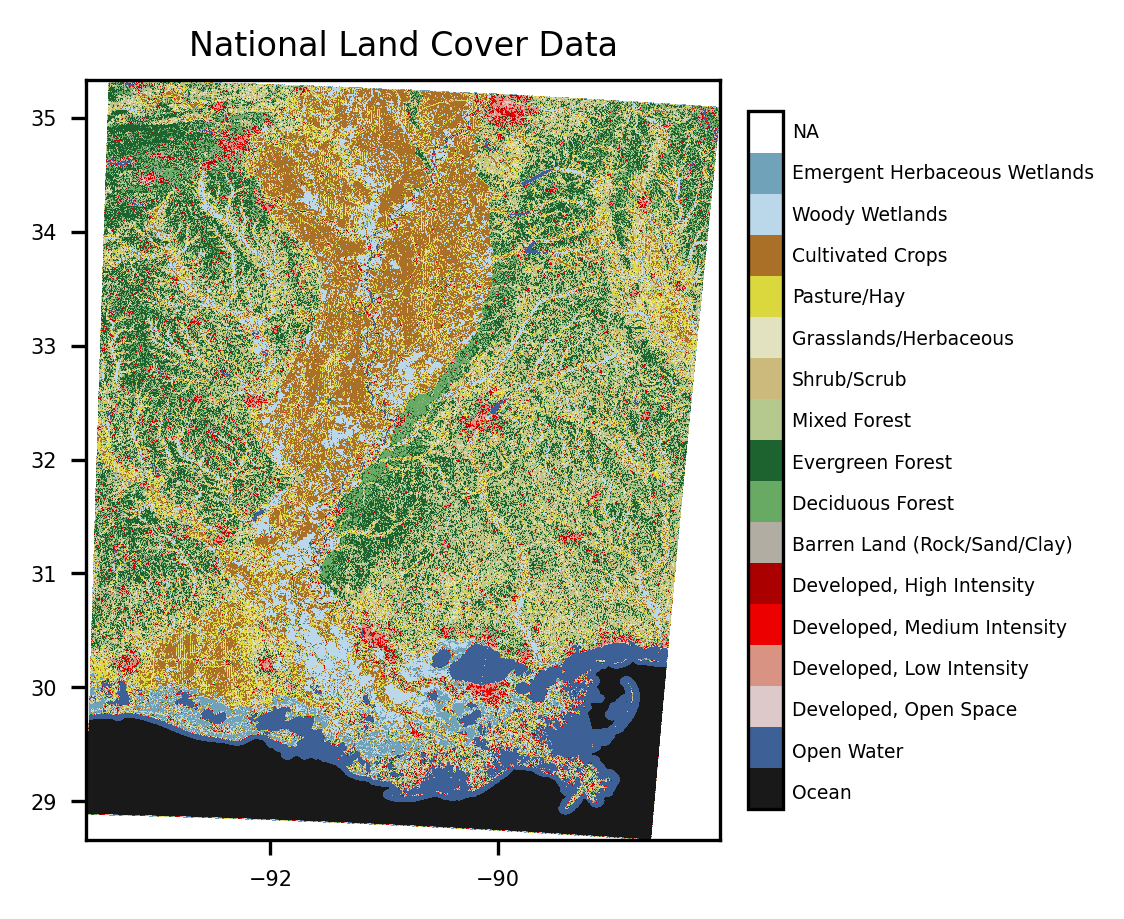

In [28]:
plt.figure(figsize=(3,4.5), dpi=300)
p = plt.imshow(data2,extent=[lon1,lon2,lat1,lat2],cmap=rgb_cmap)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.title("National Land Cover Data",fontsize=8)

# set up colorbar
cbar = plt.colorbar(p, fraction=0.05, pad=0.04)
cbar.set_ticks(list())
for idx, label in enumerate(lct):
    # set x and y pixel coordinates of the colorbar labels
    x = 20
    y = (2*idx+0.5)/2.11
    cbar.ax.text(x,y,label,fontsize=4.5)
 
plt.show()